# K-Nearest Neighbours (KNN) Classifier - From Scratch

## Problem Statement

You are provided with a small dataset of fruits classified based on their weight, size, and color.
The goal is to implement the K-Nearest Neighbors (KNN) algorithm from scratch using only Python and NumPy (no external libraries like sklearn, pandas, etc.) to classify new fruit samples into one of the three types: **Apple**, **Banana**, or **Orange**.

## Load and Pre-process the Data

Let's begin by loading the given dataset into a NumPy matrix and apply some pre-processing (namely ordinal encoding for the labels).

In [43]:
import numpy as np

data = [
    [150, 7.0, 1, 'Apple'],
    [120, 6.5, 0, 'Banana'],
    [180, 7.5, 2, 'Orange'],
    [155, 7.2, 1, 'Apple'],
    [110, 6.0, 0, 'Banana'],
    [190, 7.8, 2, 'Orange'],
    [145, 7.1, 1, 'Apple'],
    [115, 6.3, 0, 'Banana']
]

def preprocess_data(df):

    # Not much to explain here, just Ordinal Encoding.
    encoding = {'Apple':0,'Banana':1,'Orange':2}
    X = []
    y = []

    for row in df:
        X.append(row[:-1])
        y.append(encoding[row[3]])

    return np.array(X),np.array(y)

X,y = preprocess_data(data)

X

array([[150. ,   7. ,   1. ],
       [120. ,   6.5,   0. ],
       [180. ,   7.5,   2. ],
       [155. ,   7.2,   1. ],
       [110. ,   6. ,   0. ],
       [190. ,   7.8,   2. ],
       [145. ,   7.1,   1. ],
       [115. ,   6.3,   0. ]])

## Implementing the KNN Classifier

Next, we'll move on to creating our KNN Classifier class!

In [44]:
def calc_dist(p1,p2):

    # Function to calculate Euclidean distance between two points.
    return np.sum((p1-p2)**2)

class KNN_Classifier:

    def __init__(self,k=3):

        self.k = k              # Number of nearest neighbors to look in.
        self.X = None           # Training dataset features that will be added later.
        self.y = None           # Training dataset labels.
        self.encoding = {'Apple':0,'Banana':1,'Orange':2}       # For decoding!

    def fit(self,X,y):

        # Just initialise the model's reference dataset to the training dataset.
        self.X = X
        self.y = y

    def predict_one(self, x):

        # Find distance of x from all the points in the reference set.
        dists = [(calc_dist(x,x_i),y_i) for x_i,y_i in zip(self.X,self.y)]
        dists.sort()        # Sort them in ascending order.

        # Store frequences of labels of the k-nearest neighbours.
        neighour_occurences = {}
        for i in range(self.k):
            if dists[i][1] not in neighour_occurences.keys():
                neighour_occurences[dists[i][1]] = 1
            else:
                neighour_occurences[dists[i][1]] += 1

        # Find the modal label.        
        max_occ = 0
        max_freq_label = ""

        for class_label in neighour_occurences.keys():
            if neighour_occurences[class_label] > max_occ:
                max_occ = neighour_occurences[class_label]
                max_freq_label = class_label
            
        # Decode the label.
        for label, enc in self.encoding.items():
            if max_freq_label == enc:
                return label            

    def predict(self, X_test):

        # Use the above prediction function for all the test points.
        preds = []
        for x_i in X_test:
            preds.append(self.predict_one(x_i))
        
        return np.array(preds)

## Testing the Classifier

Alright, now let's train the model and try out some predictions!

In [45]:
knn = KNN_Classifier()

knn.fit(X,y)

test_data = np.array([
    [118, 6.2, 0],  # Expected: Banana
    [160, 7.3, 1],  # Expected: Apple
    [185, 7.7, 2]   # Expected: Orange
])

y_actual = np.array(['Banana','Apple','Orange'])
knn.predict(test_data)

array(['Banana', 'Apple', 'Orange'], dtype='<U6')

Seems to work as intended!

# Bonus Tasks!

Let's now try some bonus tasks!

## Implement a Simple Accuracy Checker

Let's make a simple one which simply returns the fraction of correct predictions out of the total test points passed.

In [46]:
def check_accuracy(y_actual,y_pred):

    # return fraction of correct predictions by totoal predictions.
    return np.sum(y_actual==y_pred)/y_pred.shape

check_accuracy(y_actual,knn.predict(test_data))

array([1.])

100%!

## Normalize Features

Let's implement **Z-Score Normalization**. The normalised value $X'$ is defined as:

$X' = \frac{X - \mu}{\sigma}$

where:
- $X$ is a value in the feature vector.
- $\mu$ is the mean of the data.
- $\sigma$ is the standard deviation of the data.

In [47]:
def normalize(X):

    def calcZScore(X_i):
        mean = np.mean(X_i)         # Mean of the numbers.
        sdev = np.sqrt(np.mean((X_i - mean)**2))        # Standard Deviation of the numbers.
        return (X_i - mean) / sdev      # Return the Z-Score of the numbers.
    
    _,n = X.shape

    for i in range(n):

        # Use the function above for each feature column.
        X[:,i] = calcZScore(X[:,i])

    return X

print(normalize(X))


[[ 0.15815423  0.13068205  0.16012815]
 [-0.92633194 -0.74053163 -1.12089708]
 [ 1.24264041  1.00189574  1.44115338]
 [ 0.33890193  0.47916753  0.16012815]
 [-1.28782733 -1.61174531 -1.12089708]
 [ 1.6041358   1.52462395  1.44115338]
 [-0.02259346  0.30492479  0.16012815]
 [-1.10707964 -1.0890171  -1.12089708]]


Seems to have worked.. Now let's see if anything's changed.

In [48]:
knn.fit(normalize(X),y)

check_accuracy(knn.predict(normalize(test_data)),y_actual)

array([1.])

Predictions are still the same!

## Try a Different Distance Metric

Let's use **Manhattan Distance**. The Manhattan Distance between two vectors $a$ and $b$ is defined as:

Manhattan Distance $(a,b) = \sum_{i=1}^n |a_i - b_i|$

Let's reuse the earlier code and modify it a bit..

In [49]:
def calc_dist(p1,p2):
    # Changed to use Manhttan distance instead of Euclidean distance.
    return np.sum(abs(p1-p2))

class KNN_Classifier_M:

    def __init__(self,k=3):
        self.k = k
        self.X = None
        self.y = None
        self.encoding = {'Apple':0,'Banana':1,'Orange':2}

    def fit(self,X,y):
        self.X = X
        self.y = y

    def predict_one(self, x):
        dists = [(calc_dist(x,x_i),y_i) for x_i,y_i in zip(self.X,self.y)]      # Only this line has different values of distance stored as it is Manhattan and not Euclidean.
        dists.sort()

        neighour_occurences = {}
        for i in range(self.k):
            if dists[i][1] not in neighour_occurences.keys():
                neighour_occurences[dists[i][1]] = 1
            else:
                neighour_occurences[dists[i][1]] += 1
        
        max_occ = 0
        max_freq_label = ""

        for class_label in neighour_occurences.keys():
            if neighour_occurences[class_label] > max_occ:
                max_occ = neighour_occurences[class_label]
                max_freq_label = class_label
            
        for label, enc in self.encoding.items():
            if max_freq_label == enc:
                return label

            

    def predict(self, X_test):
        preds = []
        for x_i in X_test:
            preds.append(self.predict_one(x_i))
        
        return np.array(preds)

Let's now test the data!

In [ ]:
knn = KNN_Classifier_M()
knn.fit(X,y)

test_data = np.array([
    [118, 6.2, 0],  # Expected: Banana
    [160, 7.3, 1],  # Expected: Apple
    [185, 7.7, 2]   # Expected: Orange
])

y_actual = np.array(['Banana','Apple','Orange'])
print(knn.predict(test_data))

['Orange' 'Orange' 'Orange']
[[ 0.15815423  0.13068205  0.16012815]
 [-0.92633194 -0.74053163 -1.12089708]
 [ 1.24264041  1.00189574  1.44115338]
 [ 0.33890193  0.47916753  0.16012815]
 [-1.28782733 -1.61174531 -1.12089708]
 [ 1.6041358   1.52462395  1.44115338]
 [-0.02259346  0.30492479  0.16012815]
 [-1.10707964 -1.0890171  -1.12089708]]


Oh well.. That's a little off the mark! Guess the Manhattan Distance metric isn't the best choice for this situation.

## Visualize Features

Let's try to plot the relationships between any two feature vectors!

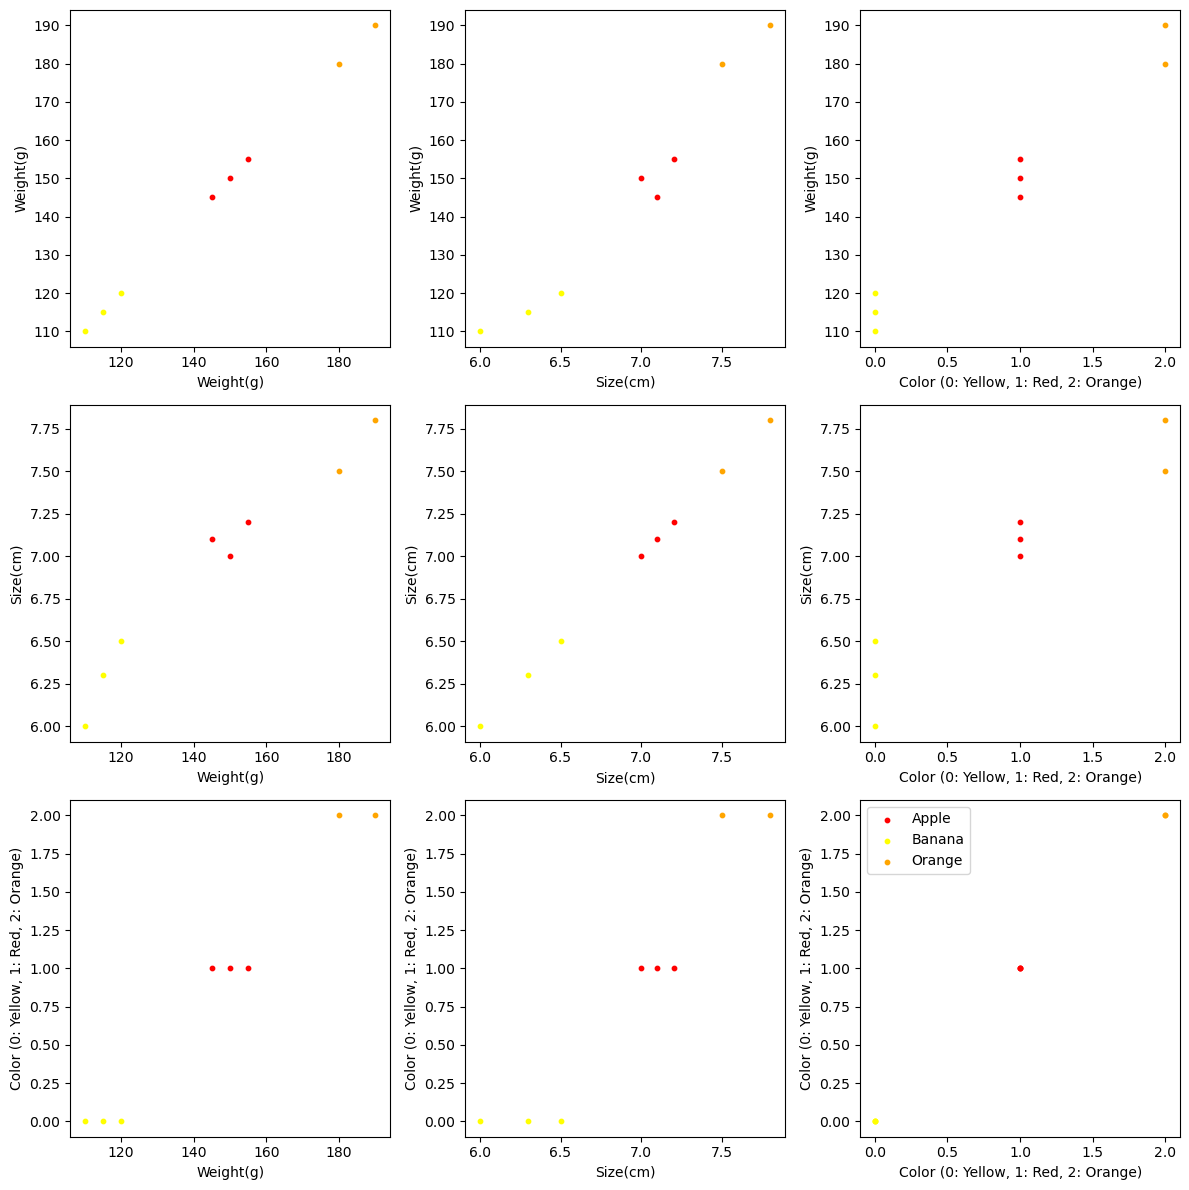

In [56]:
import matplotlib.pyplot as plt

def draw_graphs(X,y):
    _,n = X.shape
    colors = ['red','yellow','orange']
    labels = {1:'Banana',0:'Apple',2:'Orange'}
    features = ['Weight(g)', 'Size(cm)', 'Color (0: Yellow, 1: Red, 2: Orange)']
    fig, axes = plt.subplots(n,n, figsize=(12,12))

    for i in range(n):
        for j in range(n):
            ax = axes[i,j]
            for label in np.unique(y):
                ax.scatter(
                    X[y==label, j],
                    X[y==label, i],
                    label = f'{labels[label]}',
                    color = colors[label],
                    s=10
                )
                ax.set_xlabel(f'{features[j]}')
                ax.set_ylabel(f'{features[i]}')
                

    plt.tight_layout()
    plt.legend()
    plt.show()

X,y = preprocess_data(data)
draw_graphs(X,y)